In [1]:
#import packages
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the first file from csv and import as a dataframe and view first few rows of the data and info
oil_data=pd.read_csv(r"C:\Users\powerd2\Desktop\Python project\crude-oil-price.csv",na_values="n/a")
print (oil_data.head())
print (oil_data.info())

                  date  price  percentChange  change
0  1983-03-30T00:00:00  29.27            NaN     NaN
1  1983-04-04T00:00:00  30.63       4.646396    1.36
2  1983-05-02T00:00:00  30.25      -1.240614   -0.38
3  1983-06-01T00:00:00  31.38       3.735537    1.13
4  1983-07-01T00:00:00  32.00       1.975781    0.62
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           481 non-null    object 
 1   price          481 non-null    float64
 2   percentChange  480 non-null    float64
 3   change         480 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB
None


In [3]:
#rename the columns to allow for easier comparison later
oil_data.rename(columns={"price":"oil_price","percentChange":"oil_%change","change":"oil_change"},inplace=True)
print (oil_data.head())

                  date  oil_price  oil_%change  oil_change
0  1983-03-30T00:00:00      29.27          NaN         NaN
1  1983-04-04T00:00:00      30.63     4.646396        1.36
2  1983-05-02T00:00:00      30.25    -1.240614       -0.38
3  1983-06-01T00:00:00      31.38     3.735537        1.13
4  1983-07-01T00:00:00      32.00     1.975781        0.62


In [4]:
#convert the format of the oil_data date column to DateTime to make easier to work with 
oil_data.date = pd.to_datetime(oil_data.date)
print (oil_data.head())

        date  oil_price  oil_%change  oil_change
0 1983-03-30      29.27          NaN         NaN
1 1983-04-04      30.63     4.646396        1.36
2 1983-05-02      30.25    -1.240614       -0.38
3 1983-06-01      31.38     3.735537        1.13
4 1983-07-01      32.00     1.975781        0.62


In [5]:
#read second csv file for gasoline price comparison and inspect the first few rows and columns types
gas_data = pd.read_csv(r"C:\Users\powerd2\Desktop\Python project\PET_PRI_GND_DCUS_NUS_W.csv",na_values="n/a",parse_dates=["Date"])
print (gas_data.head())
print (gas_data.info())

        Date     A1     A2     A3     R1     R2     R3     M1     M2     M3  \
0 1995-01-02  1.127  1.104  1.231  1.079  1.063  1.167  1.170  1.159  1.298   
1 1995-01-09  1.134  1.111  1.232  1.086  1.070  1.169  1.177  1.164  1.300   
2 1995-01-16  1.126  1.102  1.231  1.078  1.062  1.169  1.168  1.155  1.299   
3 1995-01-23  1.132  1.110  1.226  1.083  1.068  1.165  1.177  1.165  1.296   
4 1995-01-30  1.131  1.109  1.221  1.083  1.068  1.162  1.176  1.163  1.291   

      P1     P2     P3     D1  
0  1.272  1.250  1.386  1.104  
1  1.279  1.256  1.387  1.102  
2  1.271  1.249  1.385  1.100  
3  1.277  1.256  1.378  1.095  
4  1.275  1.255  1.370  1.090  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1361 non-null   datetime64[ns]
 1   A1      1361 non-null   float64       
 2   A2      1361 non-null   float64       
 3   A

In [6]:
#gas_price reprsents the weekly average USD price per gallon of all types of gasoline. I will use this for comparison
gas_data.rename(columns={"A1":"gas_price","Date":"date"},inplace=True)
print (gas_data.head())

        date  gas_price     A2     A3     R1     R2     R3     M1     M2  \
0 1995-01-02      1.127  1.104  1.231  1.079  1.063  1.167  1.170  1.159   
1 1995-01-09      1.134  1.111  1.232  1.086  1.070  1.169  1.177  1.164   
2 1995-01-16      1.126  1.102  1.231  1.078  1.062  1.169  1.168  1.155   
3 1995-01-23      1.132  1.110  1.226  1.083  1.068  1.165  1.177  1.165   
4 1995-01-30      1.131  1.109  1.221  1.083  1.068  1.162  1.176  1.163   

      M3     P1     P2     P3     D1  
0  1.298  1.272  1.250  1.386  1.104  
1  1.300  1.279  1.256  1.387  1.102  
2  1.299  1.271  1.249  1.385  1.100  
3  1.296  1.277  1.256  1.378  1.095  
4  1.291  1.275  1.255  1.370  1.090  


In [7]:
#slice only the columns I want for analysis
gas_data = gas_data.loc[:,"date":"gas_price"]
print(gas_data.head()) 
print (gas_data.info())

        date  gas_price
0 1995-01-02      1.127
1 1995-01-09      1.134
2 1995-01-16      1.126
3 1995-01-23      1.132
4 1995-01-30      1.131
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1361 non-null   datetime64[ns]
 1   gas_price  1361 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.4 KB
None


In [8]:
#using .diff and .pct_change to get change and %change
gas_data["gas_%change"] = gas_data.gas_price.pct_change().mul(100)
gas_data["gas_change"] = gas_data.gas_price.diff()
print (gas_data.head())
print (gas_data.tail(2))

        date  gas_price  gas_%change  gas_change
0 1995-01-02      1.127          NaN         NaN
1 1995-01-09      1.134     0.621118       0.007
2 1995-01-16      1.126    -0.705467      -0.008
3 1995-01-23      1.132     0.532860       0.006
4 1995-01-30      1.131    -0.088339      -0.001
           date  gas_price  gas_%change  gas_change
1359 2021-01-18      2.464     2.538494       0.061
1360 2021-01-25      2.478     0.568182       0.014


In [9]:
#resample the gas data to monthend
gas_data.set_index("date",inplace=True)
gas_data_monthly = gas_data.resample("M").mean()
print (gas_data_monthly.head())

            gas_price  gas_%change  gas_change
date                                          
1995-01-31    1.13000     0.090043     0.00100
1995-02-28    1.12025    -0.220736    -0.00250
1995-03-31    1.11850     0.001059     0.00000
1995-04-30    1.15725     1.376695     0.01575
1995-05-31    1.22520     1.027694     0.01240


In [10]:
#resample oil data to monthend
oil_data.set_index("date",inplace=True)
oil_data_monthly = oil_data.resample("M").mean()
print (oil_data_monthly.head())

            oil_price  oil_%change  oil_change
date                                          
1983-03-31      29.27          NaN         NaN
1983-04-30      30.63     4.646396        1.36
1983-05-31      30.25    -1.240614       -0.38
1983-06-30      31.38     3.735537        1.13
1983-07-31      32.00     1.975781        0.62


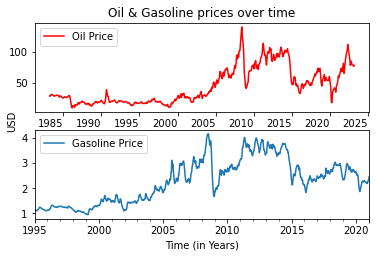

In [11]:
#plot the data on subplots for comparison
fig, axes = plt.subplots(nrows=2, ncols=1)
oil_data["oil_price"].plot(legend=True,color="red",ax=axes[0],rot=0, label="Oil Price")
gas_data["gas_price"].plot(legend=True,ax=axes[1],label="Gasoline Price")
plt.xlabel("Time (in Years)")
plt.ylabel("USD",y=1.1)
plt.title("Oil & Gasoline prices over time",y=2.2)
plt.show()

In [12]:
#merge dataframes together for comparison
combo_data = gas_data_monthly.merge(oil_data_monthly,on="date",how="left")
print (combo_data.head())

            gas_price  gas_%change  gas_change  oil_price  oil_%change  \
date                                                                     
1995-01-31    1.13000     0.090043     0.00100      18.39     3.547297   
1995-02-28    1.12025    -0.220736    -0.00250      18.49     0.543774   
1995-03-31    1.11850     0.001059     0.00000      19.17     3.677664   
1995-04-30    1.15725     1.376695     0.01575      20.38     6.311946   
1995-05-31    1.22520     1.027694     0.01240      18.89    -7.311089   

            oil_change  
date                    
1995-01-31        0.63  
1995-02-28        0.10  
1995-03-31        0.68  
1995-04-30        1.21  
1995-05-31       -1.49  


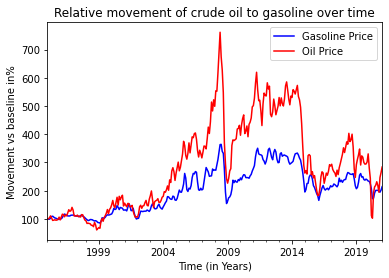

In [13]:
#normalise the data and plot to look at the correlation of the course of the period 
combo_price = combo_data.loc[:,["gas_price","oil_price"]]
cp_nml = combo_price.div(combo_price.iloc[0]).mul(100) 
cp_nml.rename(columns={"gas_price":"Gasoline Price","oil_price":"Oil Price"},inplace=True)
cp_nml.plot(title = "Relative movement of crude oil to gasoline over time",color=["blue","red"]) 
plt.xlabel("Time (in Years)")
plt.ylabel("Movement vs baseline in%")
plt.show()

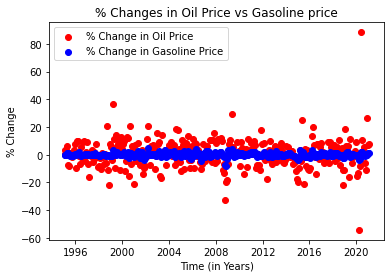

In [14]:
#Plot the % changes in oil and gas on scatterplot
fig, ax = plt.subplots()
plt.scatter(combo_data.index,combo_data['oil_%change'],color='red', label="% Change in Oil Price")
plt.scatter(combo_data.index,combo_data['gas_%change'],color="blue",label="% Change in Gasoline Price")
ax.set_title("% Changes in Oil Price vs Gasoline price")
ax.set_xlabel("Time (in Years)")
ax.set_ylabel("% Change")
plt.legend(loc="upper left")
plt.show()

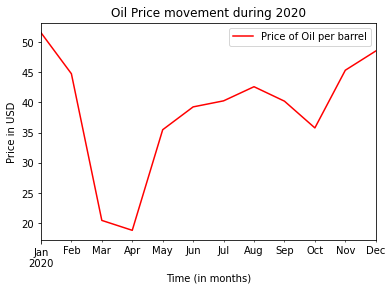

In [15]:
#slice out 2020 to look at the most volatile year
combo_2020 = combo_data.loc["2020-01-31":"2020-12-31"]
combo_2020["oil_price"].plot(label="Price of Oil per barrel",xlabel="Time (in months)",ylabel="Price in USD",color="red",title="Oil Price movement during 2020")
plt.legend (loc="upper right")
plt.show()

In [16]:
#import electric cars dataset from csv
el_car = pd.read_csv(r"C:\Users\powerd2\Desktop\Python project\Electric Cars.csv",na_values="n/a",parse_dates=["Year"])
print (el_car.head(2))
print (el_car.tail(2))
print (el_car.info())

        Year  BEV average price (USD) Global Sales Volume Mileage (Km)  \
0 2010-01-01                  64032.0               50000          127   
1 2011-01-01                  51736.0               60000          139   

   Lithium Ion Battery Price (USD)  Unnamed: 5  Unnamed: 6  \
0                           1191.0         NaN         NaN   
1                            924.0         NaN         NaN   

   Average price of new car  
0                   37500.0  
1                   37311.0  
   Year  BEV average price (USD) Global Sales Volume  \
14  NaT                      NaN                 NaN   
15  NaT                      NaN                       

                                         Mileage (Km)  \
14                                                NaN   
15  The prices have been adjusted to 2022 dollar v...   

    Lithium Ion Battery Price (USD)  Unnamed: 5  Unnamed: 6  \
14                              NaN         NaN         NaN   
15                              N

In [17]:
#clean up the data by dropping any n/a values, eliminating the null columns and rows with missing values and inspect top and bottom
el_car.dropna(axis=1,how="all",inplace=True)
el_car.dropna(axis=0,how="any",inplace=True)
print(el_car.head(1))
print (el_car.tail(1))

        Year  BEV average price (USD) Global Sales Volume Mileage (Km)  \
0 2010-01-01                  64032.0               50000          127   

   Lithium Ion Battery Price (USD)  Average price of new car  
0                           1191.0                   37500.0  
         Year  BEV average price (USD) Global Sales Volume Mileage (Km)  \
11 2021-01-01                  52900.0             4792500          349   

    Lithium Ion Battery Price (USD)  Average price of new car  
11                            132.0                   49185.0  


In [18]:
#reformat the Year datetime object to Years and convert the global sales volume from an object to a numerical value and inspect
el_car["Year"]=el_car["Year"].dt.strftime('%Y')
el_car["Global Sales Volume"] = pd.to_numeric(el_car["Global Sales Volume"],errors="coerce")

print (el_car.head(2))
print (el_car.info())

   Year  BEV average price (USD)  Global Sales Volume Mileage (Km)  \
0  2010                  64032.0                50000          127   
1  2011                  51736.0                60000          139   

   Lithium Ion Battery Price (USD)  Average price of new car  
0                           1191.0                   37500.0  
1                            924.0                   37311.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             12 non-null     object 
 1   BEV average price (USD)          12 non-null     float64
 2   Global Sales Volume              12 non-null     int64  
 3   Mileage (Km)                     12 non-null     object 
 4   Lithium Ion Battery Price (USD)  12 non-null     float64
 5   Average price of new car         12 non-null     float64
dt

In [19]:
#slice out only the year and sales columns
el_sales = el_car.loc[:,["Year","Global Sales Volume"]]
print (el_sales.head(1))

   Year  Global Sales Volume
0  2010                50000


In [20]:
#resample the oil data again to years and reformat to years
gas_inyrs= gas_data.resample("Y").mean()
gas_inyrs.index=gas_inyrs.index.strftime('%Y')
print (gas_inyrs.head(2))

      gas_price  gas_%change  gas_change
date                                    
1995   1.157712     0.004443    0.000020
1996   1.244528     0.233523    0.002755


In [21]:
#join the oil and electric car data sets 

gas_el=el_sales.merge(gas_inyrs,left_on="Year",right_on="date",how="left")
print(gas_el.head())

   Year  Global Sales Volume  gas_price  gas_%change  gas_change
0  2010                50000   2.835058     0.306366    0.008538
1  2011                60000   3.576423     0.139501    0.004058
2  2012                80000   3.679642     0.041955    0.000981
3  2013               150000   3.575365     0.034175    0.000769
4  2014               224700   3.436615    -0.667048   -0.019558


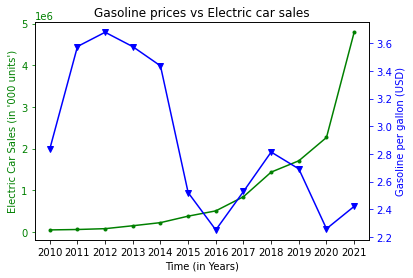

In [22]:
#plot the two variable on two x axes by creating a twin axis
fig, ax = plt.subplots()
ax.plot(gas_el["Year"],gas_el["Global Sales Volume"],color="green",marker=".")
ax.set_xlabel("Time (in Years)")
ax.set_ylabel("Electric Car Sales (in '000 units')",color="green")
ax.tick_params("y",colors="green")
ax2 = ax.twinx()
ax2.plot(gas_el["Year"],gas_el["gas_price"],color="blue",marker="v")
ax2.set_ylabel("Gasoline per gallon (USD)",color="blue")
ax2.tick_params("y",colors="blue")
plt.title("Gasoline prices vs Electric car sales")
plt.show()